In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")
print("the number of unique classes is ",data['label'].nunique())
print("the number of feature is",data.shape[1]-1)
print("number of nulls in the data = ",data.isnull().sum().sum())
# the data of the image in a flat array not in matrix 
print(data.shape)

the number of unique classes is  10
the number of feature is 784
number of nulls in the data =  0
(60000, 785)


In [3]:
#make allocation for the test and train data
X= data.iloc[:,1:]
X=X/255
y= data.iloc[:,0:1]
X_train,X_test,y_train,y_test= train_test_split(
        X,
        y,
        test_size=0.2, 
        random_state=42  
    )
X_train = X_train.copy().to_numpy()
X_test = X_test.copy().to_numpy()
y_train = y_train.copy().to_numpy().flatten()
y_test = y_test.copy().to_numpy().flatten()
print("The training digits data:\n", X_train.shape)
print("Digit labels: ", y_train.shape)

The training digits data:
 (48000, 784)
Digit labels:  (48000,)


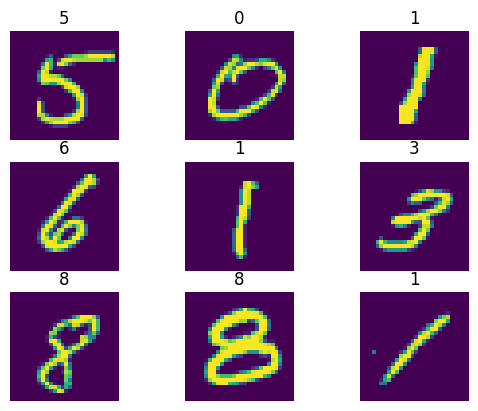

In [4]:
for i in range(9):
    ax = plt.subplot(3, 3,i+1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.title(y_train[i])
    plt.axis("off")

In [5]:
knn = KNeighborsClassifier()
# train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [227]:

space = [
     {"weights": ["uniform", "distance"],
      "n_neighbors": [2, 3, 5, 7]
     }
 ]

knn_grid_search = GridSearchCV(knn, param_grid=space, cv=3, scoring="accuracy", n_jobs=2)
knn_grid_search.fit(X_train, y_train)
print(knn_grid_search.best_estimator_)

KNeighborsClassifier(n_neighbors=3, weights='distance')


In [6]:
Knn_best_parameters = KNeighborsClassifier(n_neighbors=3, weights='distance')
Knn_best_parameters.fit(X_train, y_train)
y_pred = Knn_best_parameters.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(knn_accuracy)

0.9735833333333334


In [7]:
# the dense don't need to put the shape of the input 
#MODEL 1
model1= keras.Sequential([
     Dense(units=64,activation="relu"),
     Dense(units=10,activation="softmax")
])
model1.compile(optimizer=Adam(learning_rate=0.001),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
model1.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.8554 - loss: 0.5353
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.9486 - loss: 0.1770
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.9650 - loss: 0.1208
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9726 - loss: 0.0965
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.9775 - loss: 0.0772
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.9827 - loss: 0.0605
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.9837 - loss: 0.0545
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.9880 - loss: 0.0426
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.9892 - loss: 0.0365
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.9911 - loss: 0.0301


In [8]:
#MODEL 2 
model2= keras.Sequential([
     Dense(units=32,activation="relu"),
     Dense(units=10,activation="softmax")
])
model2.compile(optimizer=Adam(learning_rate=0.01),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])
model2.fit(X_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.8500 - loss: 0.4956
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.9438 - loss: 0.1919
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9574 - loss: 0.1456
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9602 - loss: 0.1271
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9665 - loss: 0.1087
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.9696 - loss: 0.0977
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9683 - loss: 0.0944
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.9702 - loss: 0.0904
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9708 - loss: 0.0908
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.9745 - loss: 0.0826


In [9]:
loss1, accuracy1=model1.evaluate(X_test,y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9744 - loss: 0.0921


In [10]:
loss2, accuracy2=model2.evaluate(X_test,y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9592 - loss: 0.1447


In [11]:
#get the best between the 2 different ANN
best_ANN_model=model1
best_ANN_accuracy = accuracy1
if accuracy1<accuracy2:
    best_ANN_model=model2
    best_ANN_accuracy = accuracy2

y_predict=best_ANN_model.predict(X_test)
print(y_predict[0])
#to get the argument of the max value in the y_predict[0]
print("the prediction for the first example in test data = ",np.argmax(y_predict[0]))
 

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
[2.5501766e-08 1.4779250e-06 1.5809896e-07 1.2257209e-06 1.3874091e-08
 3.8157811e-08 4.6743232e-10 9.9926585e-01 2.5719913e-09 7.3118065e-04]
the prediction for the first example in test data =  7


Neural network model is the best
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step


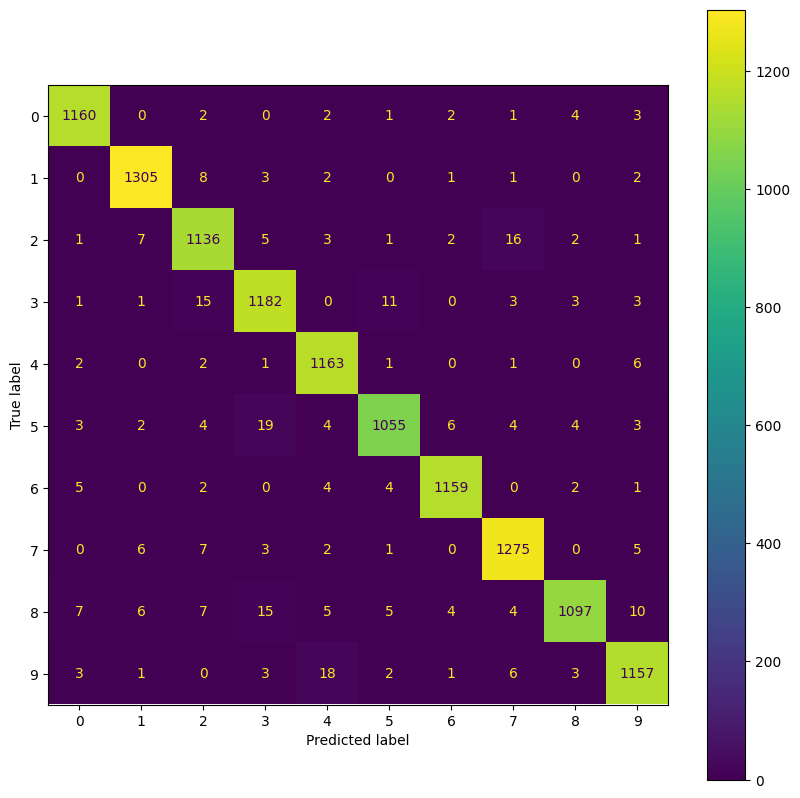

In [12]:
if(knn_accuracy>best_ANN_accuracy):
    print("KNN model is the best")
    best_model = Knn_best_parameters
    with open("best_model.joblib", "wb") as f:
        import joblib
        joblib.dump(best_model, f)
else:
    print("Neural network model is the best")
    best_model = best_ANN_model
    best_model.save("best_model.keras")
    predicted_labels = best_model.predict(X_test)
    predicted_labels = np.argmax(predicted_labels, axis=1)  
conf_matrix = confusion_matrix(y_test, predicted_labels)
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(conf_matrix)
cf_mat_disp.plot(ax=cm_ax)
plt.show()